
# Project: Medical Appointment No Show - Dataset 

## Table of Contents
<ul>
<li><a href="#intro">I.Introduction</a></li>
<li><a href="#wrangling">II. Data Wrangling</a></li>
<li><a href="#eda">III. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">IV. Conclusions</a></li>
</ul>

<a id='intro'></a>
## I. Introduction

### I.1. Dataset Description 

This dataset collects information from [100k medical appointments in Brazil](https://www.kaggle.com/datasets/joniarroba/noshowappointments) and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### I.2. Column names Description 

Most of the column names are self-explanatory. Yet, they are few that could be misunderstood as:
**ScheduledDay:** The day of the actuall appointment, when they have to visit the doctor.
**AppointmentDay:** The day someone called or registered the appointment, this is before appointment of course.
**Neighborhood:** indicates the location of the hospital.
**Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
**No Show:** *No* indicates the patient showed up to their appointment and *Yes* if they did not show up.


### I.3. Questions for Analysis

**Section I: Analysis related to the no-showing appointments**

 What is the average waiting time between the registeration date and the appointment date?
 Does receiving SMS associated with probability of show up for the appointment ?
 Does the waiting time affect the rate of showing up for an appointment?

**Section II: Analysis related to the patient medical health**

Which Gender is associated more with medical health issues?

**Section III: Analysis related to the health units**

 What are the neighbourhoods with the highest number of reservations?
 what is the precentage of attended and absent patient from their medical appointment at the highest reservation neighbourhood?
 Do neighbourhoods with high appointmentsIDs receive high patient absence relatively to the rest of neighbourhoods?


<a id='wrangling'></a>
## II. Data Wrangling 
- In this section the data will be *loaded* and *assessed* to investigate data types, look for missing, duplicates values or possibly errant data. Simultaneously, data will be *cleaned* and fixed in the same section.


### II.1.Basic Steps for Analysis

#### II.1.1. Import statements

In [1]:
# For data analysis
import pandas as pd
import numpy as np
import datetime 

#For data visualization
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sbn
%matplotlib inline

#For higher resoluation graphs
%config InlineBackend.figure_format = 'retina'

#### II.1.2. Load data

In [2]:
# Loading data and printing out a few lines. Performing operations to inspect data
df = pd.read_csv('noshow.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


**From the above data:** 
>1. There are some typos (e.g. Hipertesnion) needed to be corrected (e.g. Hypertension).
>2. SchedualDay is a misleading name that we'd change it to RegisterationDay.

#### II.1.2.1.Fixing typos and renaming column names:

In [3]:
#Renaming (PatientId --> PatientID ,ScheduledDay --> RegisterationDay, Hipertension --> Hypertension, Handcap --> Handicap , No-show --> No_show
df.rename(columns = {'PatientId':'PatientID','ScheduledDay': 'RegisterationDay', 'Hipertension': 'Hypertension', 'Handcap':'Handicap','No-show':'No_show'},inplace=True)
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'RegisterationDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

### II.2. General info. about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientID         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Gender            110527 non-null  object 
 3   RegisterationDay  110527 non-null  object 
 4   AppointmentDay    110527 non-null  object 
 5   Age               110527 non-null  int64  
 6   Neighbourhood     110527 non-null  object 
 7   Scholarship       110527 non-null  int64  
 8   Hypertension      110527 non-null  int64  
 9   Diabetes          110527 non-null  int64  
 10  Alcoholism        110527 non-null  int64  
 11  Handicap          110527 non-null  int64  
 12  SMS_received      110527 non-null  int64  
 13  No_show           110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**From the above data:** 
>1. It seems there is neither missing nor duplicate values in the data as the total number of data values and entries in each column were the same (110527)
>2.'PatientId' and 'AppointmentID' don't need to be of numeric type (float or int) since they are just IDs. Accordingly, they will be converted to str. 
>3. 'RegisterationDay' and 'AppointmentDay' are needed to change their type from str to datetime in order to get the waiting days between the appointment and registered date


#### II.2.1. Coverting Patient ID and Appointment ID to string type

In [5]:
# Converting PatientId in float to string type:
df['PatientID']= df['PatientID'].astype(str)

# Confirming the new change
type(df['PatientID'][0])

str

In [6]:
# Converting AppointmentID in integer to string type:
df['AppointmentID'] = df['AppointmentID'].astype(str)

# Confirming the new change
type(df['AppointmentID'][0])

str

#### II.2.2. Coverting Registeration day and Appointment day to datetime type

In [7]:
# Converting the Registeration day in string to datetime type:
df['RegisterationDay'] = pd.to_datetime(df.RegisterationDay)
# Keeping the date and removing the time from 'RegisterationDay' column
df['RegisterationDay'] = df['RegisterationDay'].dt.date

# Converting the Appointment day in string to datetime type:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
# Keeping the date and removing the time from 'AppointmentDay' column
df['AppointmentDay'] = df['AppointmentDay'].dt.date

#Confirming the changes
df.head(1)

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
#Confirming the changes
print(type(df['RegisterationDay'][0]))
print(type(df['AppointmentDay'][0]))

<class 'datetime.date'>
<class 'datetime.date'>


#### II.2.3. Creating new column named 'WaitingDays'
- The waiting days between the appointment and registeration day could be a factor and give to us insights about reasons why the patients didn't show up to their appointments.

In [9]:
# Creating a new column (variable) containing the waiting days:
df['WaitingDays'] = df['AppointmentDay'] - df['RegisterationDay']

df.head(1)

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days


**Checking the odd values e.g. negative values to see how we can handle them.**

In [10]:
#Checking the negative values in WaitingDays column
df[df['WaitingDays'] <= '-1 days']

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


**From the above data:** 
>1. Negative values in waiting days means registeration occured *after* the appointment day. 
>2. Since they are only 5 negative values, removing them won't affect the analysis.

In [11]:
# Droping the 5 -ve values rows from the dataframe
df.drop([27033,55226,64175,71533,72362], axis=0 ,inplace=True)

### II.3. General Data Statistics
- We'll roughly explore the numaric varibles statistics and comment or fix odd outcomes

In [12]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522
mean,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10 days 04:25:19.451330956
std,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15 days 06:07:21.956876522
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


#### II.3.1. Age

- Min. and Max. are -1 and 115 which are not logic.Although the latter can be furtherly investigated. 

In [13]:
# Checking number of patients of age below 0 
df[df['Age'] < 0]

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
99832,465943158731293.0,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0 days


**From the above data:** 
>1. Since it's only one row that has a -ve value in age, replacing it with an average value of age won't be necessary.Besides, droping it won't affect the analysis as we have more than 100K data(rows)

In [14]:
# Droping the row with -1 age 
df.drop([99832], axis=0, inplace=True)

In [15]:
# Confirming the new change (Total # of age < 0 should be zero)
len(df[df['Age'] < 0])

0

**Checking the outliers in Age column**

- As for the max. value in age, it is 115. We need to check if that is an outlier or the norm


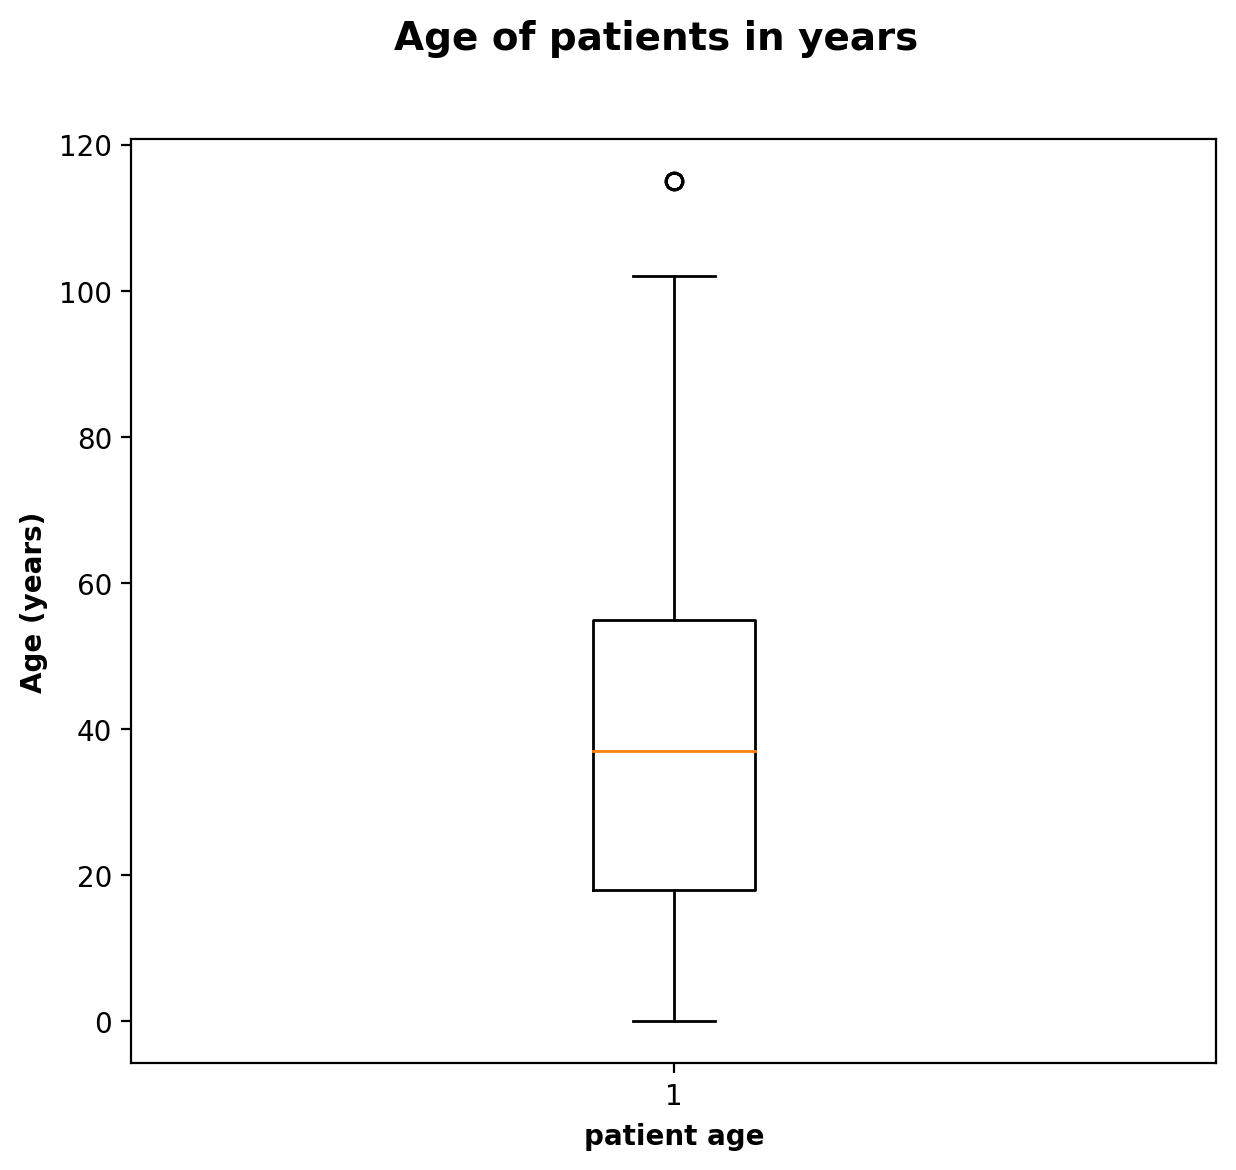

In [16]:
'''
Creating a funtion for ploting a box plot named as get_box where the 3 global variables are:
data = is dataframe needed to be plotted
x = is the lable of x-axis 
y= is the lable of y-axis 
title = is the title of the box plot
                                     '''
data = df['Age']
x = 'patient age'
y = 'Age (years)'
title = 'Age of patients in years'

def get_box(data, x, y,title):
    
    # figure related code
    fig = plt.figure(figsize=(7,6))        # define the figure window
    fig.suptitle( title, fontsize=14, fontweight='bold')       # set and adjust a title for the graph
    ax = fig.add_subplot(111)   # define the axis
    ax.boxplot(data)    # plot a boxplot
    ax.set_xlabel(x,fontsize=10, fontweight='bold')   # set a x-axis label
    ax.set_ylabel(y,fontsize=10, fontweight='bold')   # set a y-axis label
    
    plt.show() 
    
get_box(data, x, y,title)

In [17]:
# Checking number of patients of age above 100 
len(df[df['Age'] >= 100])

11

**From the above box plot and data:**
> Ages above 100 are considered to be outliers.Besides, it is uncommon people live till 100 so we'll drop them.

**Removing the outliers**


In [18]:
# creating a dataframe for the outliers (age >= 100)
drop = df[df['Age'] >= 100].index
# Dropping these outliers from the dataset:
df.drop(drop, inplace=True)

In [19]:
# confirming the new change (Total # of age >= 100 should be zero)
len(df[df['Age'] >= 100])

0

In [20]:
# confirming the new change (min became 0 and max became 99)
df['Age'].describe()     

count    110510.000000
mean         37.082409
std          23.100341
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          99.000000
Name: Age, dtype: float64

#### II.3.2. Waiting days

1. Min. and Max. are 0 and 179 (~ 6 months). The latter can be furtherly investigated.
2. We are planning to convert 'WaitingDays' column from numerical to categorical variable.

In [21]:
# Checking number of waiting days above 150 to see if there are outliers
len(df[df['WaitingDays'] > '150 days'])

56

**From the above date:**
>Due to the large total number of values above 150 days, we believe there is no need to drop any rows

**WaitingDays' from numerical to categorical variable**

1. First we need to see how the data is distributed in this column, in order to decide the range of bins in the scale
2. Data distribution will be determined via .describe() funtion and plotting a histogram
3. Finally converting the waiting days column into a categorical variable

In [22]:
#Checking data distribution using .describe() for 'WaitingDays' column
df.describe()['WaitingDays']

count                        110510
mean     10 days 04:25:33.689258890
std      15 days 06:07:48.102620147
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: WaitingDays, dtype: object

In [23]:
# Converting Timedelta of 'WaitingDays' column to Integer (Days), in order to construct a histogram
df['WaitingDays'] = df['WaitingDays'].dt.days

[Text(0.5, 0, ' waiting days'), Text(0, 0.5, 'Frequency')]

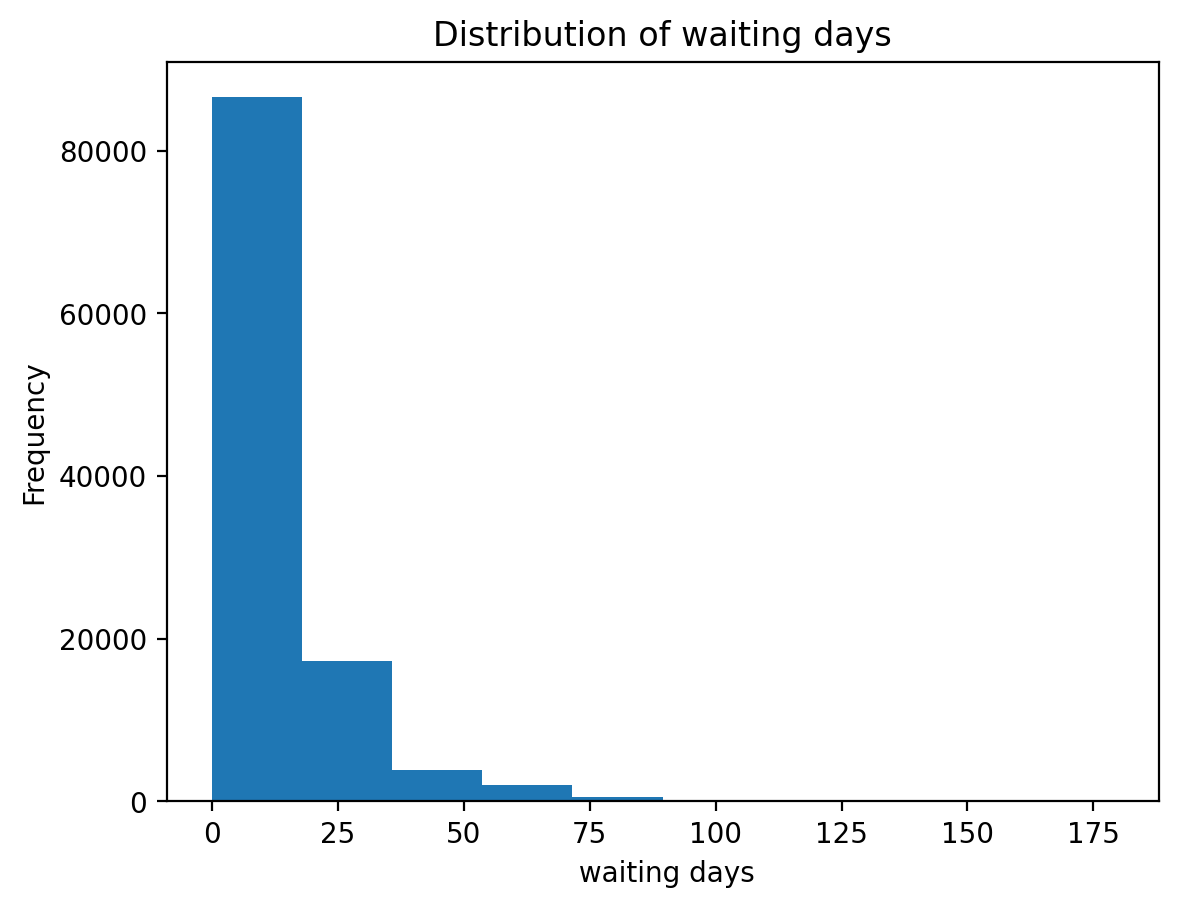

In [24]:
# Checking data distribution 'WaitingDays' column using histogram
ax = df['WaitingDays'].plot(kind = 'hist');
plt.title('Distribution of waiting days')
ax. set(xlabel=" waiting days", ylabel="Frequency")

In [25]:
# Getting data from histogram as mode, median and mean

print( 'mode of waiting days = ',df['WaitingDays'].mode())
print( 'median of waiting days = ',df['WaitingDays'].median())
print( 'mean of waiting days = ',df['WaitingDays'].mean())


mode of waiting days =  0    0
Name: WaitingDays, dtype: int64
median of waiting days =  4.0
mean of waiting days =  10.184417699755679


**From the above date:**
>1. Most of the patient reserved their appointments on the same day as the mode = 0.
>2. 50% and 75% of the waiting days were 5 and 15 days respectively.
>3.According to the histogram, majority of the waiting days data occupied with the first bin (0-15 days).
**Consequently, more bin ranges will be filling the first 15 days from the scale** 

**Converting WaitingDays column from numerical to categorical variable:**


In [26]:
# Creating a list containing the bin edges of 'WaitingDays' column
bin_edges = [-1,0,3,7,15,30,90,180]

# Creating a list of the categorical ranges for 'WaitingDays' column
bin_labels = ['Same day','Short','Week','Couple weeks','Month','quarter','Semiannual']

# Creating a 'WaitingTime' column filled with the categoircal variables
df['WaitingTime'] = pd.cut(df['WaitingDays'],bin_edges, labels = bin_labels)

df.head(3)

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,WaitingTime
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Same day
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Same day
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Same day


In [27]:
# Counting number of each categorical variable in 'WaitingTime' column
df.WaitingTime.value_counts().sort_values()

Semiannual        217
quarter         10160
Couple weeks    13526
Short           14670
Month           15867
Week            17510
Same day        38560
Name: WaitingTime, dtype: int64

**From the above data:**
>It's shown that patients tend to book for their reservation on the same day of the appointment where counts of zero waiting time (i.e. same day) is 38560

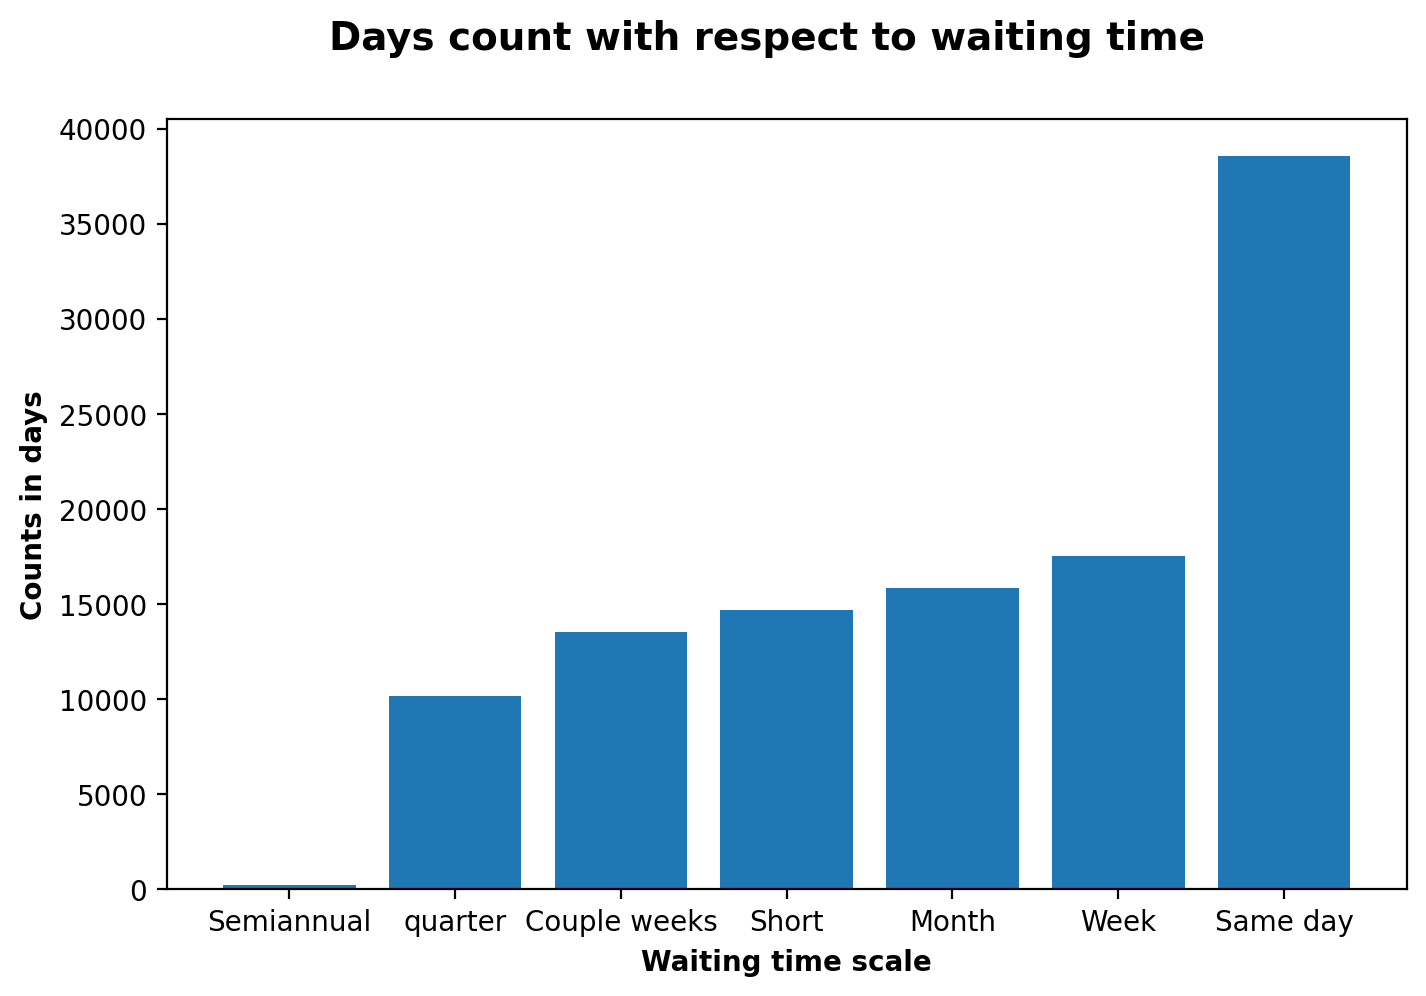

In [28]:
'''
Plotting a bar chart to have a visual comparison between the waiting time bins'''

# Convert the dataframe of waiting time column to dictionary
dic_wait = df.WaitingTime.value_counts().sort_values().to_dict()

# Axes labels and title
wait_names = list(dic_wait.keys())       # x-axis
wait_values = list(dic_wait.values())    # y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
ax.bar(wait_names,wait_values)
ax.set_ylabel('Counts in days',fontsize=10, fontweight='bold')
ax.set_xlabel('Waiting time scale',fontsize=10, fontweight='bold')
fig.suptitle('Days count with respect to waiting time',fontsize=14, fontweight='bold')

plt.show()

**From the above data and bar chart:**
>The finding displayed that the counts of appointments booked on the same day are the highest, followed by steep drop when waiting days ranged from 3-5 days .

#### II.3.3. Handicap

- In the dataset given by [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download), it is said that the handicap variable is a boolean value. However, as shown above, its value range from 0 to 4. Thus, we will convert any value higher than 0 to 1

In [29]:
# Modifying any value >0 in Handicap to be 1
df['Handicap'] = np.where( df['Handicap'] > 0 , 1, 0)
    
 # confirming the new change       
df.Handicap.value_counts()
        

0    108277
1      2233
Name: Handicap, dtype: int64

#### II.3.4. Gender

In [30]:
df.Gender.value_counts()

F    71827
M    38683
Name: Gender, dtype: int64

**From the above data:**
> Counts show that more than 50% of the patients were females

#### II.3.5. Patient and appointment IDs

In [31]:
len(df.PatientID.value_counts())

62291

In [32]:
len(df.AppointmentID.value_counts())

110510

**From the above data:**
>Although the total sum of enteries is 110,510, the 'PatientID' has counts of 62296 which less than the total (as it found in the 'AppointmentID'). This imbalance could justify by having some patients register to more than one appointment.

#### II.3.6. Neighbourhood

In [33]:
# Checking unique data of 'Neighbourhood' column
df['Neighbourhood'].nunique()

81

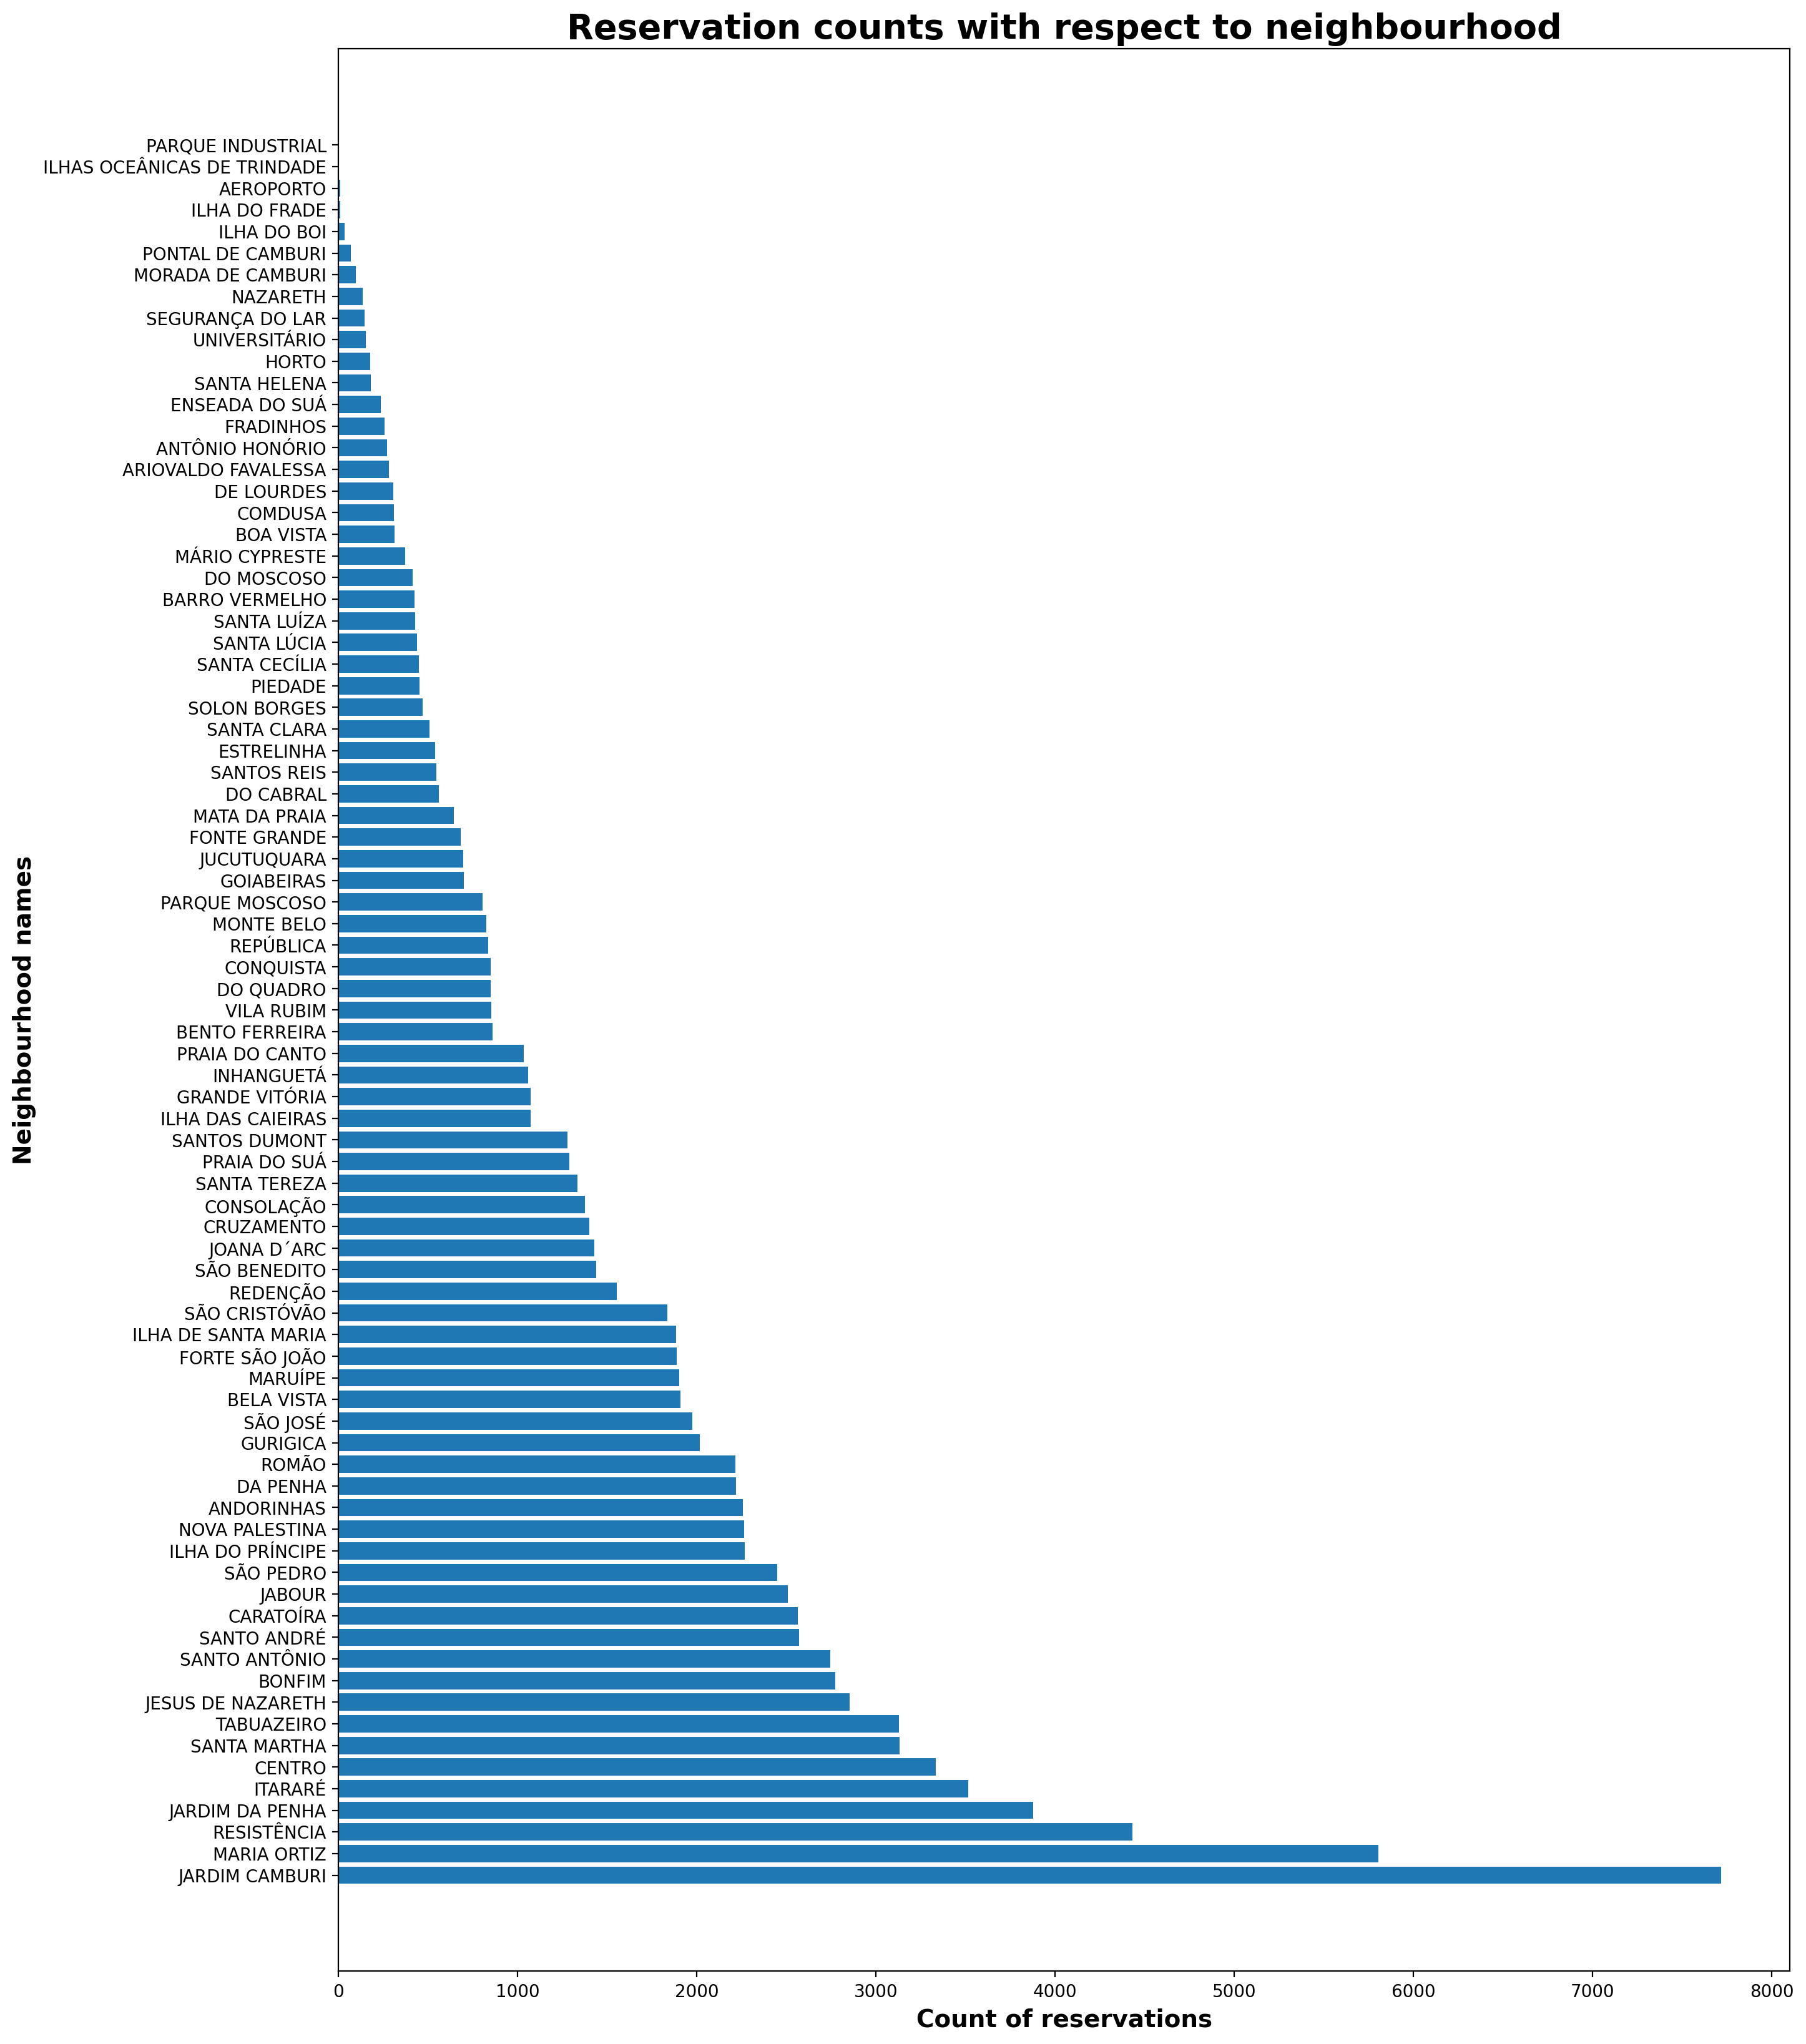

In [34]:
def neighbourhood_bar():
    '''
    Plotting a bar chart to have a visual comparison among neighbourhoods and their reservation counts
                                                                                                  '''
    # Convert the dataframe of Neighbourhood column to dictionary
    dic_neighbour = df['Neighbourhood']. value_counts().to_dict()
    
    # Axes labels and title
    neighbour_names = list(dic_neighbour.keys())       # x-axis
    neighbour_values = list(dic_neighbour.values())    # y-axis
    fig, ax = plt.subplots(1, 1, figsize=(15,20), sharey=True)
    ax.barh(neighbour_names,neighbour_values)
    ax.set_ylabel('Neighbourhood names',fontsize=14, fontweight='bold')
    ax.set_xlabel('Count of reservations',fontsize=14, fontweight='bold')
    plt.title('Reservation counts with respect to neighbourhood',fontsize=20, fontweight='bold')
   
    plt.show()
    
neighbourhood_bar()    

**From the above bar chart:**
> The bars displayed that highest reservations goes to Jardim Camburi. However, Do patients of these reservation showed up to their appointments? This question will furtherly inspect in the EAD section.

In [35]:
# Replacing the spaces within the neighbourhood names with underscores
df['Neighbourhood'] =df['Neighbourhood'].apply(lambda x: x.replace(' ','_'))

df.head(3)

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,WaitingTime
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM_DA_PENHA,0,1,0,0,0,0,No,0,Same day
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM_DA_PENHA,0,0,0,0,0,0,No,0,Same day
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA_DA_PRAIA,0,0,0,0,0,0,No,0,Same day


<a id='eda'></a>
## III. Exploratory Data Analysis


### III.1. Analysis related to the no-showing appointments

#### QIII.1.1: What is the average waiting time between the registeration date and the appointment date? 

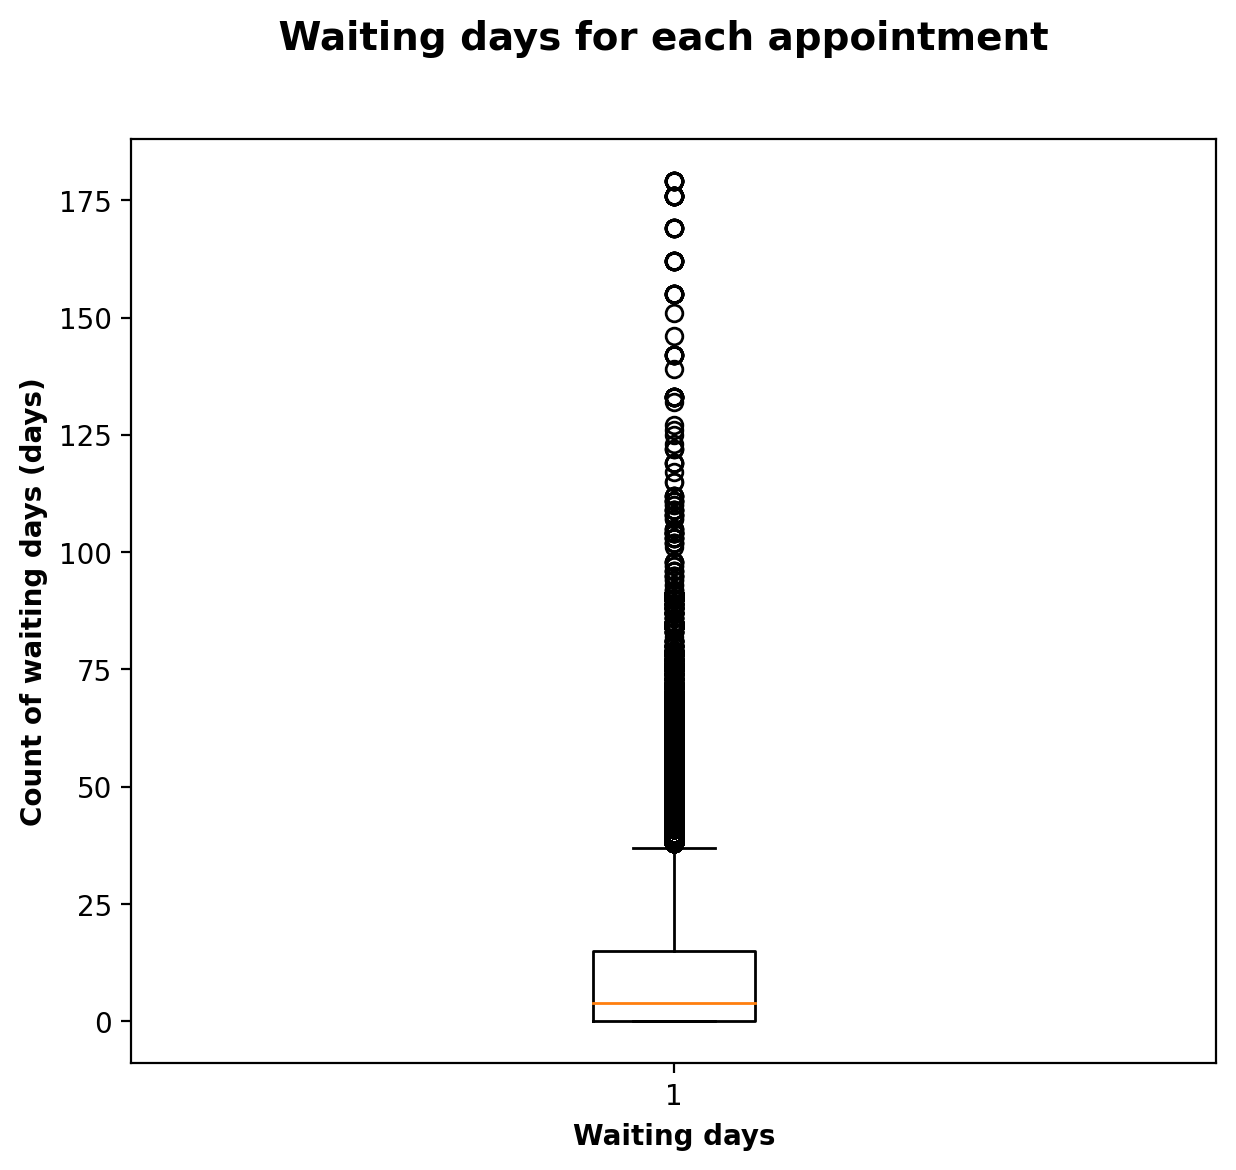

In [36]:
#creating a dataframe for waiting days
data = df['WaitingDays']

# axes labels and title
x = 'Waiting days'
y = 'Count of waiting days (days)'
title = " Waiting days for each appointment"

#Calling get_box function
get_box(data,x,y,title)

In [37]:
df['WaitingDays'].describe()

count    110510.000000
mean         10.184418
std          15.255418
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64

**From the above data and box plot:**
>The data has outliers. Accordingly, the median is usually preferred in these situations because the value of the mean can be distorted by the outliers

In [38]:
median = df['WaitingDays'].median()
print('The average of waiting time is {} days, which is equivalent to a week in the categorical scaling.'.format(median)) 

The average of waiting time is 4.0 days, which is equivalent to a week in the categorical scaling.


#### QIII.1.2: Does receiving SMS  associated with probability of show up for the appointment ? 

In [39]:
# Getting counts for each No_show and SMS_received columns
df_show = df.groupby('No_show')['SMS_received'].value_counts()
df_show

No_show  SMS_received
No       0               62503
         1               25696
Yes      0               12527
         1                9784
Name: SMS_received, dtype: int64

In [40]:
# Getting total counts for attended patients
df_showNo = df_show['No']
df_showNo

SMS_received
0    62503
1    25696
Name: SMS_received, dtype: int64

In [41]:
# Getting total counts for absent patients
df_showYes = df_show['Yes']
df_showYes

SMS_received
0    12527
1     9784
Name: SMS_received, dtype: int64

**Constructing a bar chart of attendnce state (show up or not) with respect to receiving SMS**

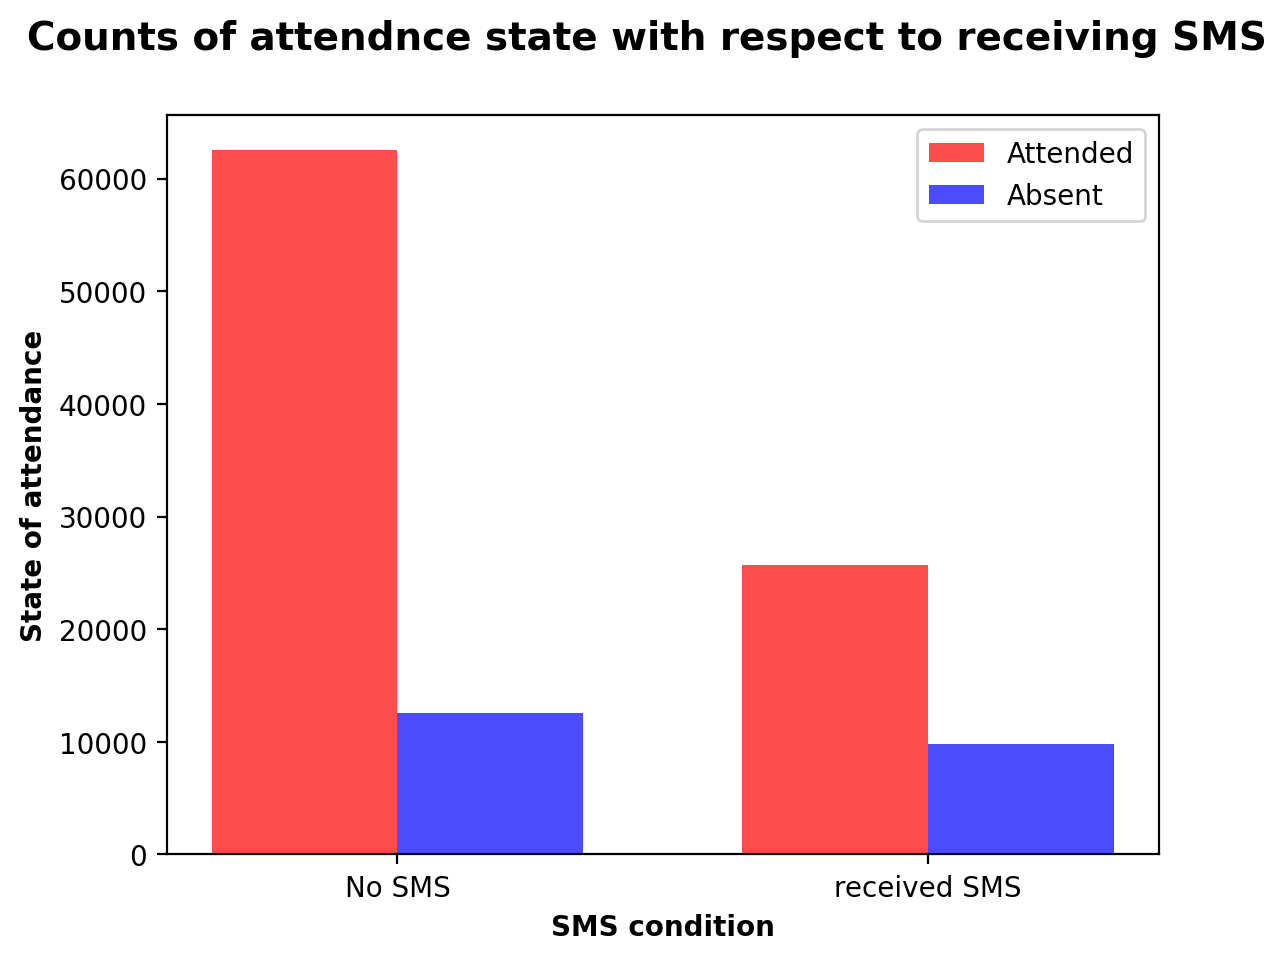

In [42]:
# Setting the x coordinate location for each No_show group and and width of each bar.
ind = np.arange(len(df_showNo))  # the x locations for the groups
width = 0.35       # the width of the bars

# Plotting bars
fig, ax = plt.subplots()
no_bars = plt.bar(ind, df_showNo, width, color='r', alpha=.7, label='Attended') #For patient who showed up
yes_bars = plt.bar(ind + width, df_showYes, width, color='b', alpha=.7, label='Absent') #For patient who didn't show up

# Title and labels
ax.set_ylabel('State of attendance',fontsize=10, fontweight='bold')
ax.set_xlabel('SMS condition',fontsize=10, fontweight='bold')
fig.suptitle('Counts of attendnce state with respect to receiving SMS',fontsize=14, fontweight='bold')
locations = ind + width / 2  # xtick locations
labels = ['No SMS','received SMS']  # xtick labels
plt.xticks(locations, labels)

# Legend
plt.legend()
plt.show()

**From the above bar chart:**
>it is clear that the patients who received SMS as reminder show-up more who didn't receive SMS. Next step is we want to convey this visual data to numerical one.

**Precentages of SMS conditions/ attendance states:**
- We want to change the data from visual to numeric. 

In [43]:
# precentage of attended patients without SMS
total_attend = df_show['No'].sum()
attend_0sms = df_show['No'][0]
p0 = (attend_0sms/total_attend) *100

# precentage of attended patients with SMS
attend_1sms = df_show['No'][1]
p1 = (attend_1sms/total_attend) *100

print('Precentage of attended patients with and without SMS are {} and {} respectively.'.format(p1,p0))

Precentage of attended patients with and without SMS are 29.1341171668613 and 70.8658828331387 respectively.


In [44]:
# precentage of absent patients without SMS
total_absent = df_show['Yes'].sum()
absent_0sms = df_show['Yes'][0]
p0 = (absent_0sms/total_absent) *100

# precentage of absent patients with SMS
absent_1sms = df_show['Yes'][1]
p1 = (absent_1sms/total_absent) *100

print('Precentage of absent patients with and without SMS are {} and {} respectively.'.format(p1,p0))

Precentage of absent patients with and without SMS are 43.85280803191251 and 56.1471919680875 respectively.


**From the above data:**
> Sending SMS as a reminder to the patients' appointment increases the number of showing-up with **~ 71 %**.On the other hand, patient who didn't receive SMS showed up with **~ 56 %.** 

#### QIII.1.3: Does the waiting time affect the rate of showing up for an appointment?

In [45]:
# Getting counts for each No_show and WaitingTime columns
df_wait = df.groupby('No_show')['WaitingTime'].value_counts()
df_wait

No_show              
No       Same day        36768
         Week            13097
         Short           11313
         Month           10708
         Couple weeks     9360
         quarter          6792
         Semiannual        161
Yes      Month            5159
         Week             4413
         Couple weeks     4166
         quarter          3368
         Short            3357
         Same day         1792
         Semiannual         56
Name: WaitingTime, dtype: int64

**For the up-coming cells,**

1- We will split the above dataframe (df_wait) into two: *dfNo* for total counts of attended patient and *dfYes* for the absent ones along with the waiting time scale.

2- Then we'll construct a line plot to see the relationship between attended and absent patient with respect to wainting time.

3- For a line plot to be created, we need first to convert the dataframes into dict., followed by customized sorting the waiting time.

In [46]:
# Getting total counts for attended patients along with the waiting time scale
dfNo = df_wait['No']
dfNo

Same day        36768
Week            13097
Short           11313
Month           10708
Couple weeks     9360
quarter          6792
Semiannual        161
Name: WaitingTime, dtype: int64

In [47]:
#Convert Dateframe of attended patients to dict:
dic_no = dfNo.to_dict()
dic_no

{'Same day': 36768,
 'Week': 13097,
 'Short': 11313,
 'Month': 10708,
 'Couple weeks': 9360,
 'quarter': 6792,
 'Semiannual': 161}

In [48]:
#Placing a customized sort of keys in a list:
keyorder = ['Same day', 'Short','Week','Couple weeks','quarter','Semiannual']

# Iterating each key and placing it in the customized order
dic_n = {k: dic_no[k] for k in keyorder if k in dic_no}
    
dic_n


{'Same day': 36768,
 'Short': 11313,
 'Week': 13097,
 'Couple weeks': 9360,
 'quarter': 6792,
 'Semiannual': 161}

In [49]:
# Getting total counts for absent patients along with the waiting time scale
dfYes = df_wait['Yes']

#Convert Dateframe of absent patients to dict:
dic_yes = dfYes.to_dict()

#Placing a customized sort of keys in a list:
keyorder = ['Same day', 'Short','Week','Couple weeks','quarter','Semiannual']

# Iterating each key and placing it in the customized order
dic_y = {k: dic_yes[k] for k in keyorder if k in dic_yes}

dic_y        

{'Same day': 1792,
 'Short': 3357,
 'Week': 4413,
 'Couple weeks': 4166,
 'quarter': 3368,
 'Semiannual': 56}

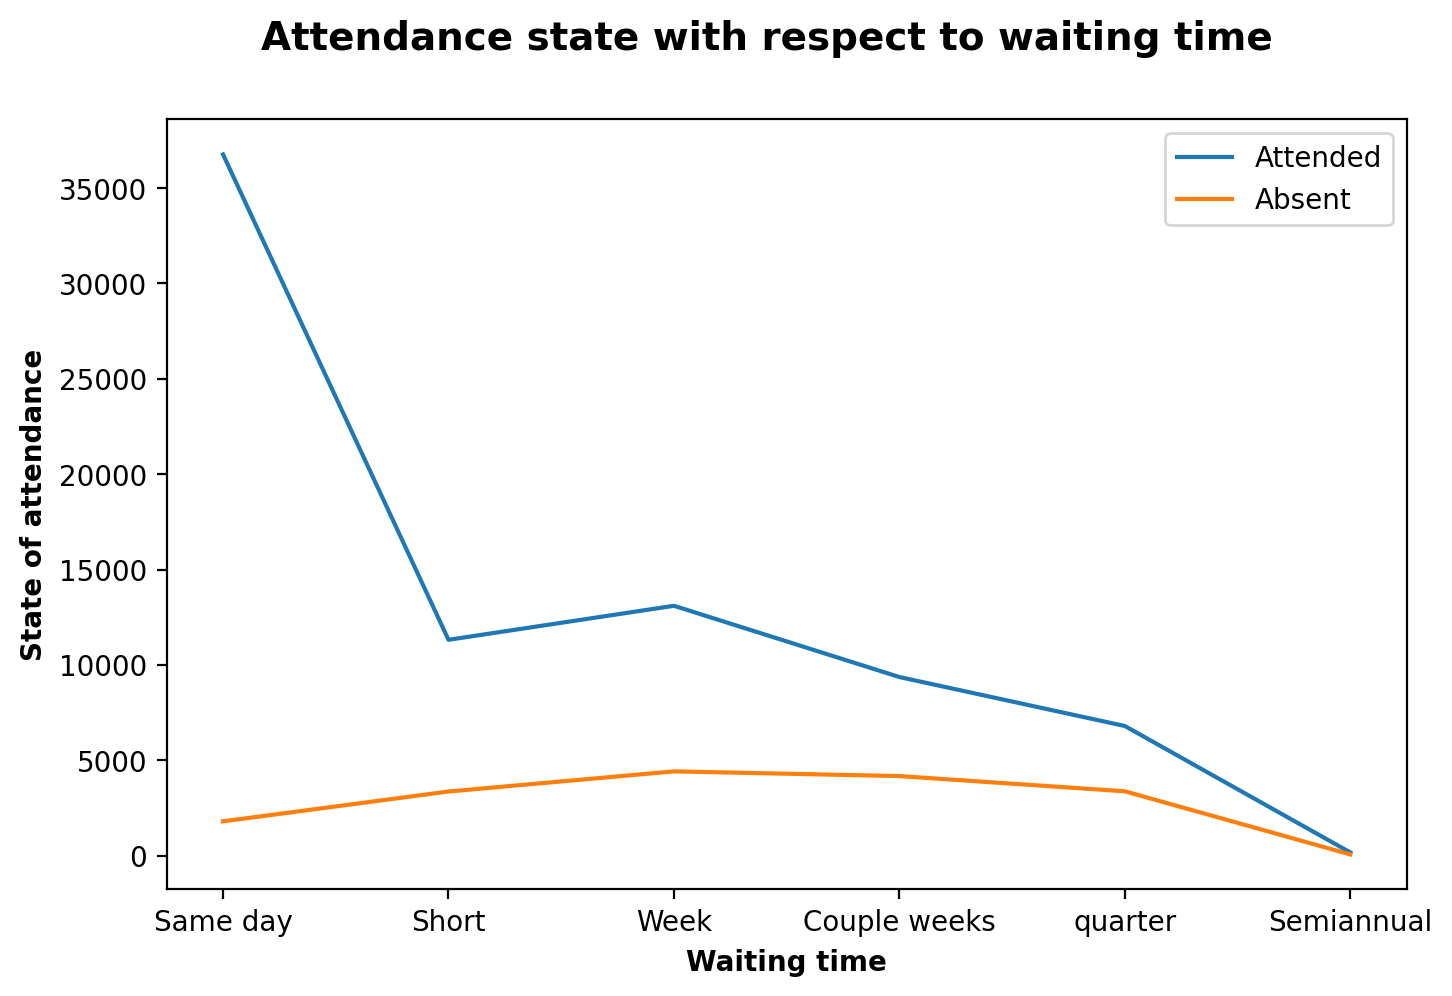

In [50]:
# Constructing a line plot for state of attendence vs waiting time scale

# Creating the axes for attended patients
namesNo = list(dic_n.keys())       # x-axis
valuesNo = list(dic_n.values())    # y-axis

# Creating the axes for absent patients
namesYes = namesNo         # same x-axis as above (common x-axis)
valuesYes = list(dic_y.values())   # y-axis

# Title and labels
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
ax.plot(namesNo, valuesNo, label="Attended")
ax.plot(namesNo, valuesYes, label="Absent")
ax.set_ylabel('State of attendance',fontsize=10, fontweight='bold')
ax.set_xlabel('Waiting time',fontsize=10, fontweight='bold')
fig.suptitle('Attendance state with respect to waiting time',fontsize=14, fontweight='bold')

ax.legend()
plt.show()


**From the above graph:**
> It is obvious that as the duration of waiting for an appointment is prolonged, the probability for showing up decreases.This illustrated with high number of patient attendance at the same day of reservation.

### III.2. Analysis related to the patient medical health

#### QIII.2.1: Which Gender is associated more with medical health issues?
- We'll compare between the 2 genders in terms of alcoholism, hypertension and diabetes via plotting pie charts

In [51]:
# checking on the columns names spelling
df.head(1)

,PatientID,AppointmentID,Gender,RegisterationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,WaitingTime
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM_DA_PENHA,0,1,0,0,0,0,No,0,Same day


**Gender association with Alcoholism**

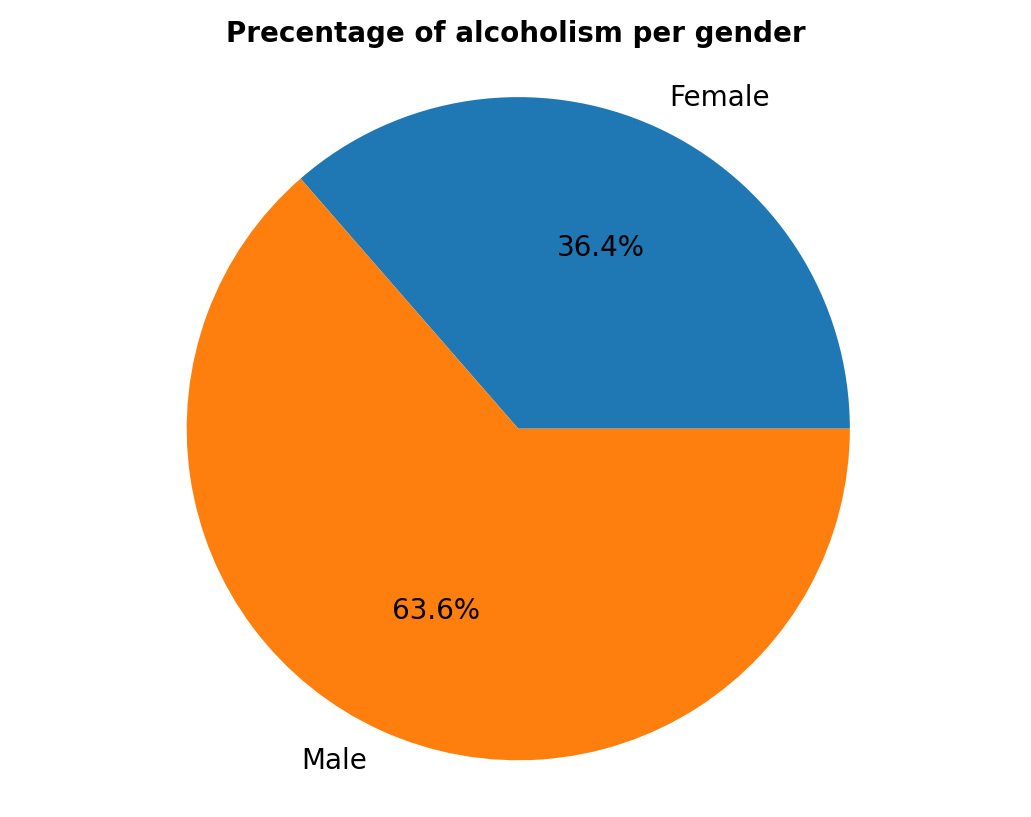

In [52]:
# Selecting and creating a dataframe for Alcoholism only
df_alcohol = df.query("Alcoholism == 1")

# Getting counts for Gender and Alcoholism columns
count_alcohol = df_alcohol.groupby('Gender')['Alcoholism'].value_counts()

'''
Creating a funtion for ploting a pie chart named as gender_pie where the 2 global variables are:
dic = outcome of dataframe needed to be plotted to dictionary 
title = is the title of the box plot
                                     '''
dic = count_alcohol.to_dict()
title = 'Precentage of alcoholism per gender'

# Plotting a pie chart 
def gender_pie(dic,title):
    labels = ['Female','Male']  
    value = list(dic.values())  # counts of alcoholism in each gender
    fig1, ax1 = plt.subplots()
    ax1.pie(value,labels=labels, autopct='%1.1f%%') # autopct for converting counts of alcoholism to precentage per gender
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title, fontsize=10, fontweight='bold')
    plt.show()
gender_pie(dic,title)

**Gender association with Hypertension**

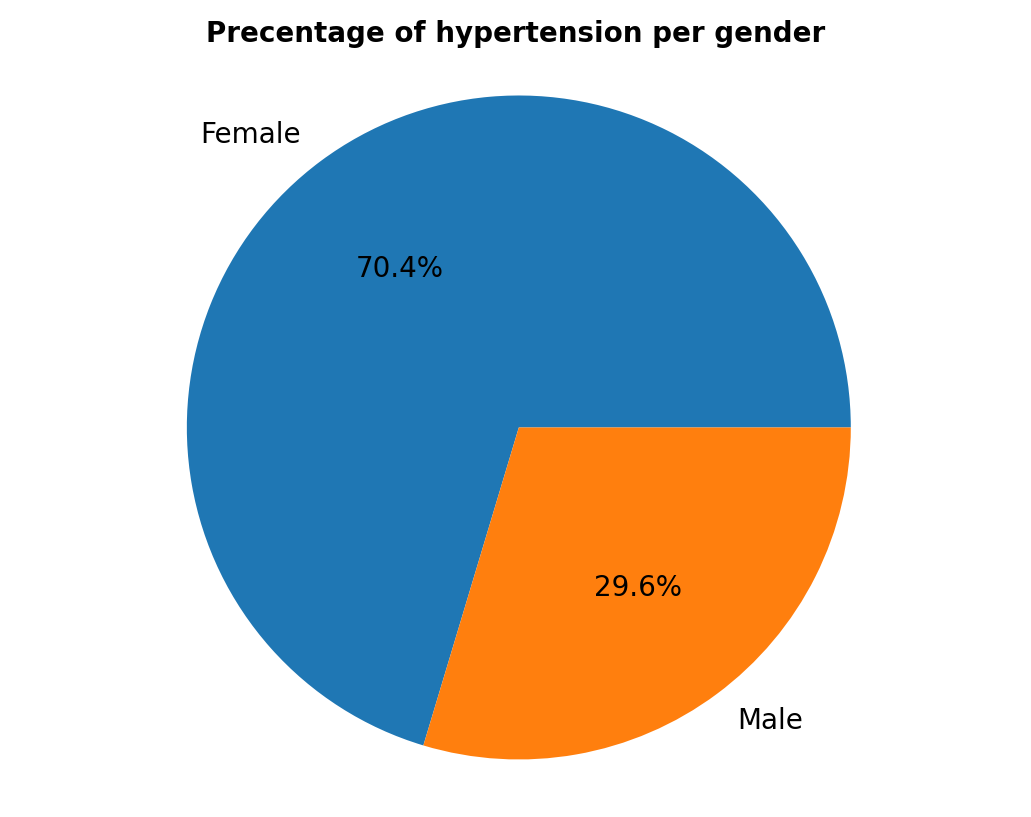

In [53]:
# Selecting and creating a dataframe for Hypertension only
df_hyper = df.query("Hypertension == 1")

# Getting counts for Gender and Hypertension columns
count_hyper = df_hyper.groupby('Gender')['Hypertension'].value_counts()

# Converting dataframe to dictionary
dic = count_hyper.to_dict()

# Title of pie chart
title = 'Precentage of hypertension per gender'

# Calling gender_pie funtion to Plot the pie chart 

gender_pie(dic, title)


**Gender association with Diabetes**

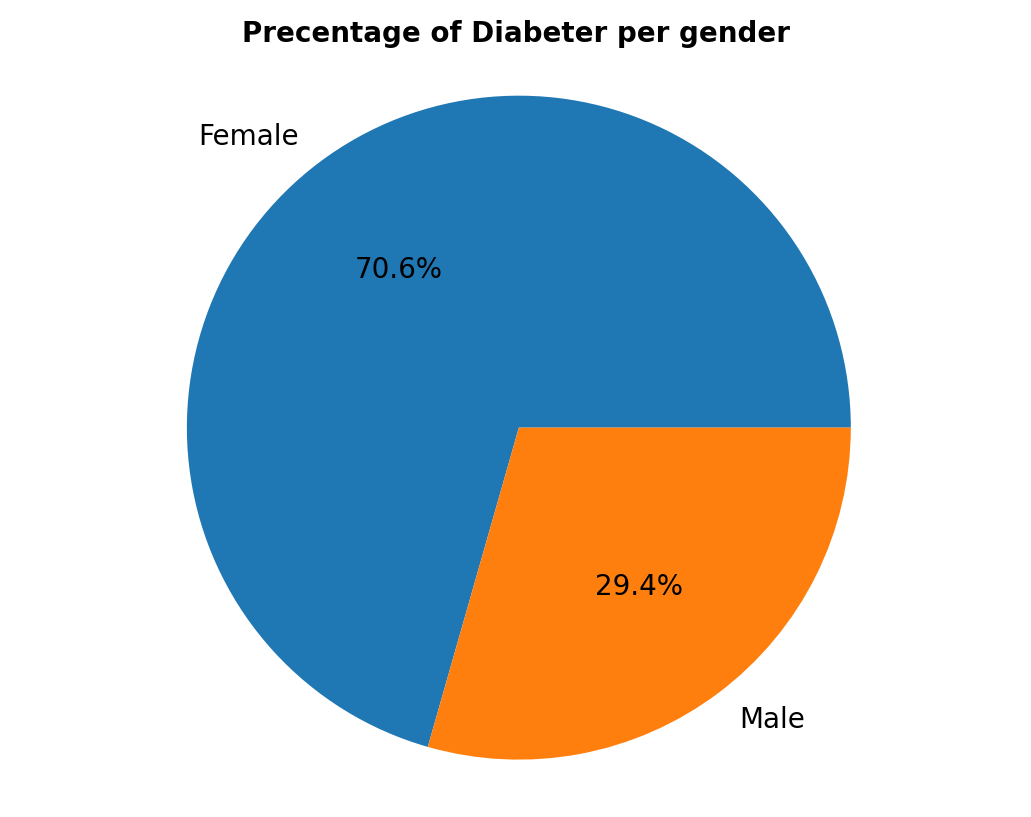

In [54]:
# Selecting and creating a dataframe for Diabetes only
df_diabetes = df.query("Diabetes == 1")

# Getting counts for Gender and Diabetes columns
count_diabetes = df_diabetes.groupby('Gender')['Diabetes'].value_counts()

# Converting dataframe to dictionary
dic = count_diabetes.to_dict()
# Title of pie chart
title = 'Precentage of Diabeter per gender'

# Calling gender_pie funtion to Plot the pie chart 

gender_pie(dic, title)


**Precentage of females and males in the dataset**

In [55]:
#count for each gender
gender_counts = df['Gender'].value_counts()
#Total count of genders
total_counts = df['Gender'].count()

#precentage of females in dataset
female_p = (gender_counts[0]/total_counts)*100

#precentage of females in dataset
male_p = (gender_counts[1]/total_counts)*100

print ("precentages of females and males in the dataset are {} and {} respectively.".format(female_p,male_p))

precentages of females and males in the dataset are 64.99592797031943 and 35.00407202968057 respectively.


**From the above data and pie charts:**
>The dataset occupies high precentage of females **(65%)** than males **(35%)** and accordingly it made sense that high ratio of hypertension and diabetes go to the females.Surprisingly, Male patients with their minority, had high ratio of *alcoholism* than the females.

### III.3. Analysis related to the health units

#### QIII.3.1: What are the neighbourhoods with the highest number of reservations?

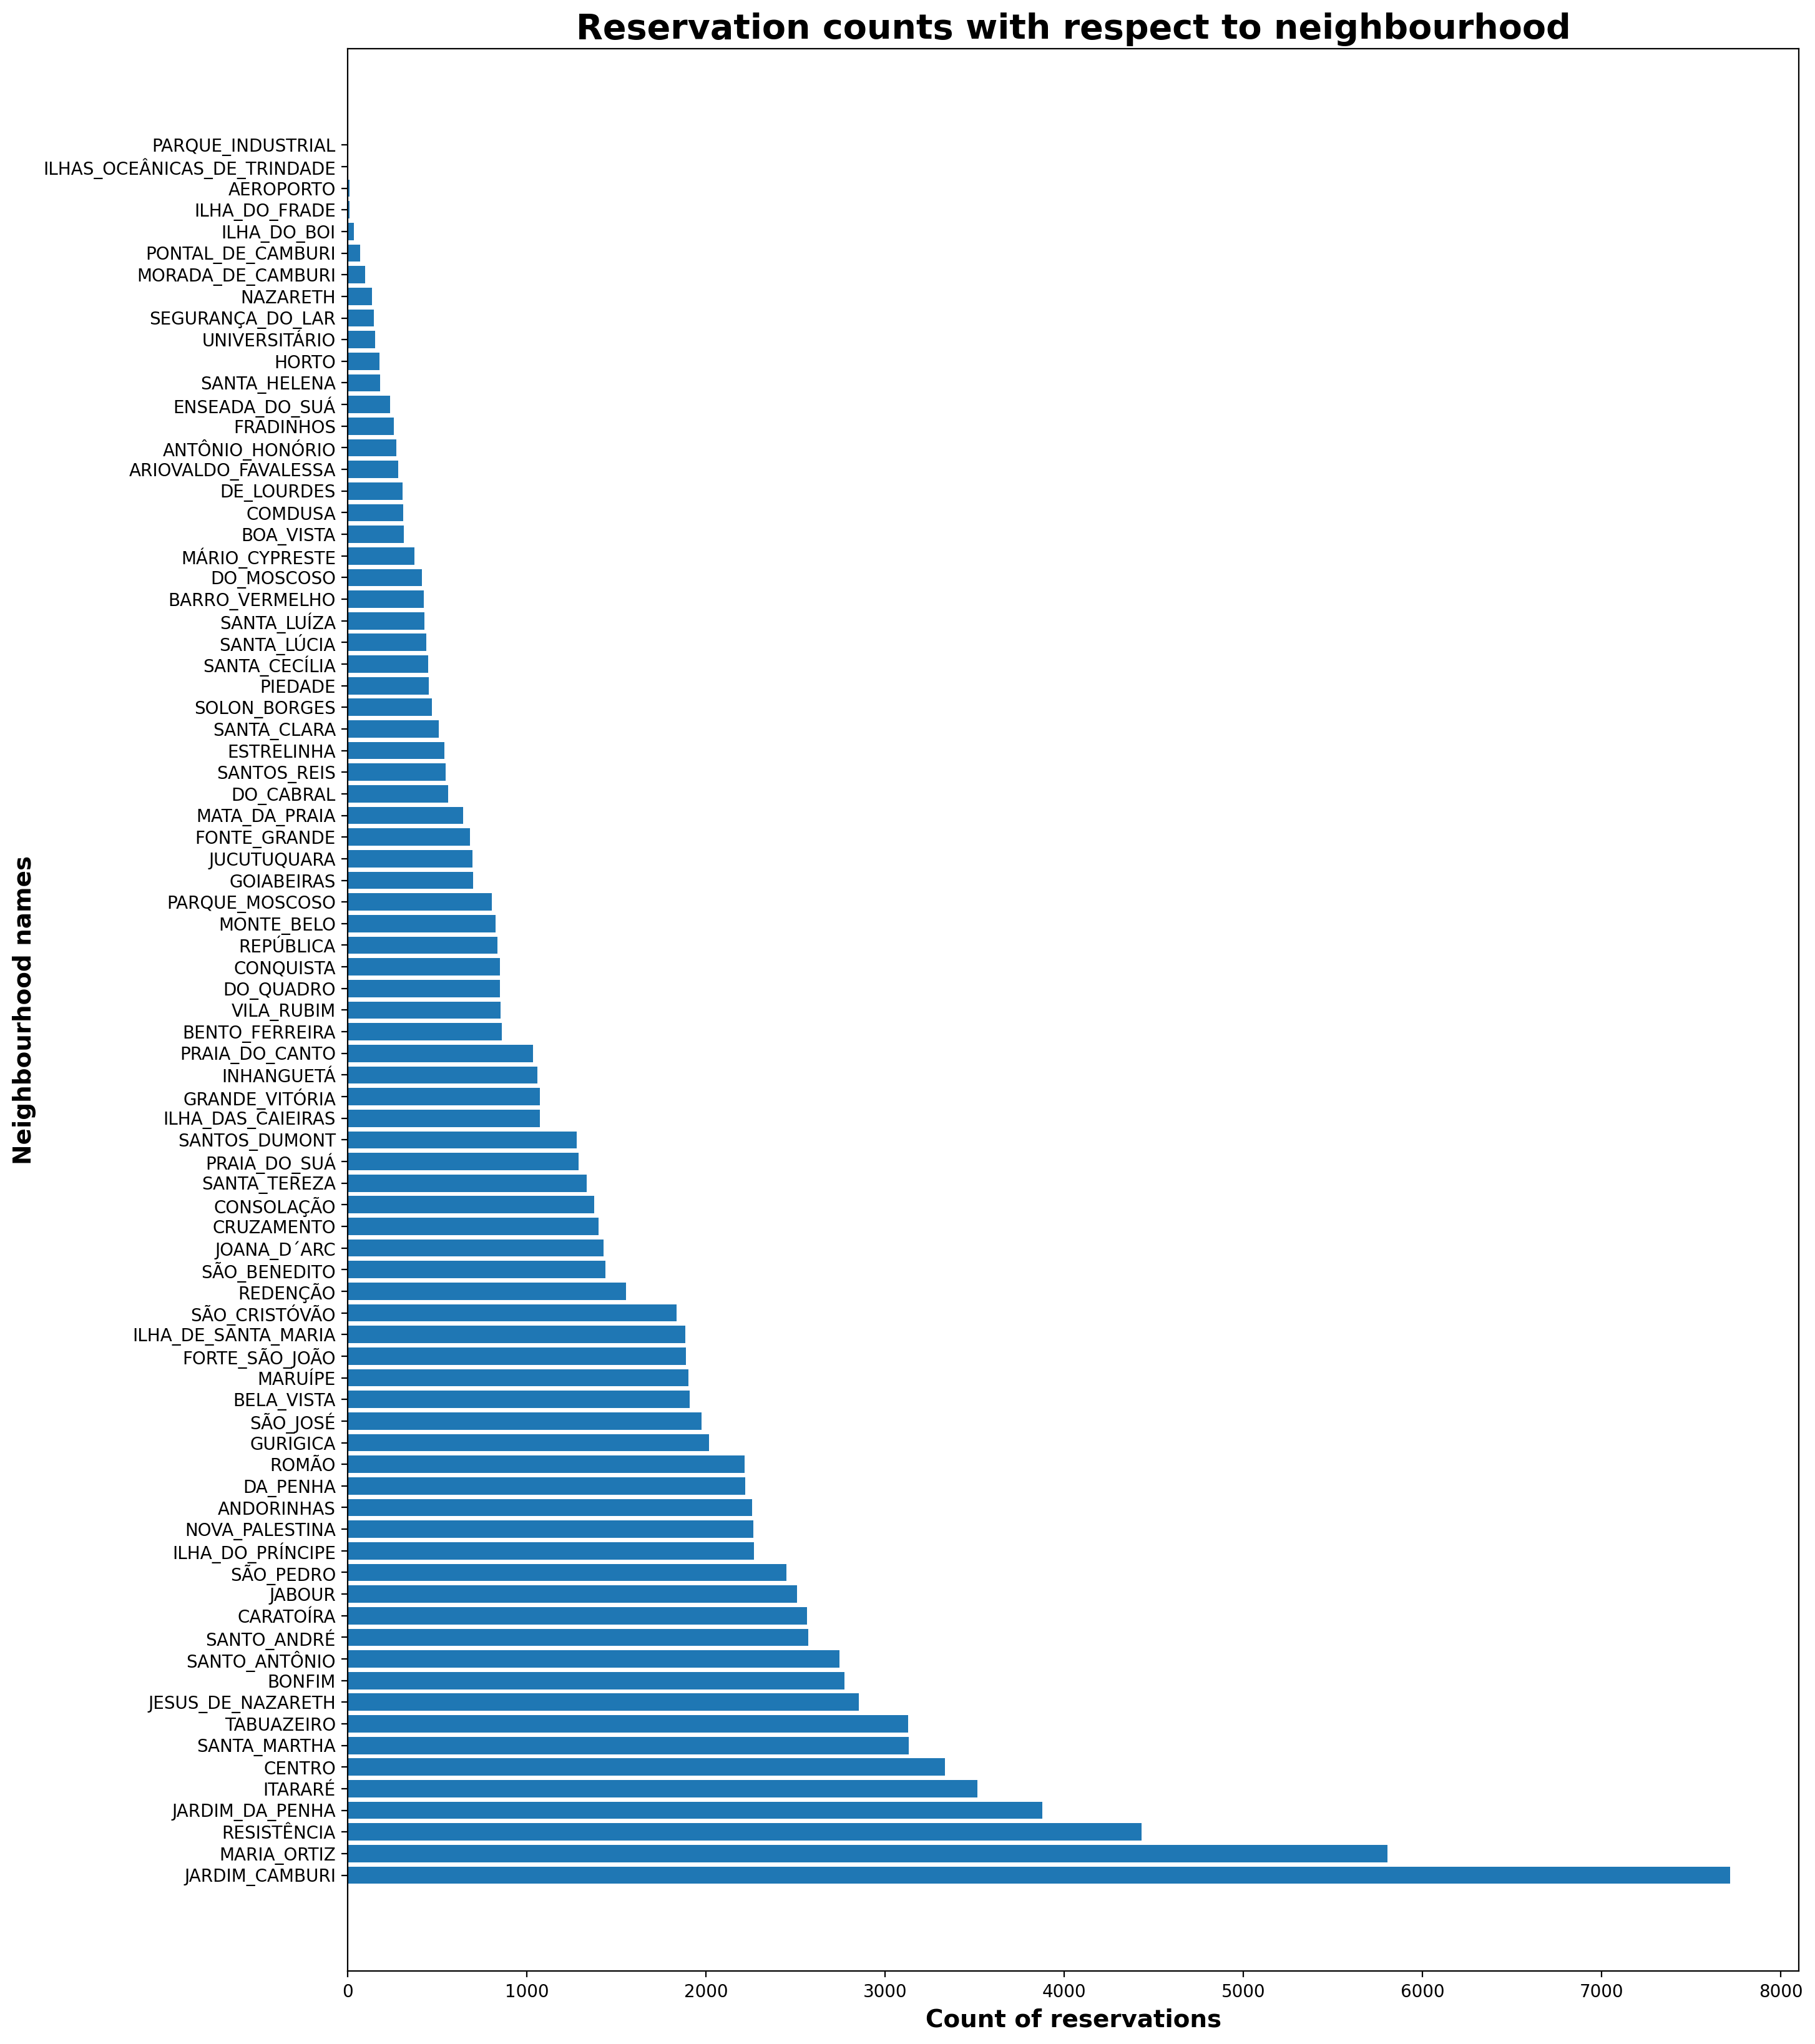

In [56]:
# Calling neighbourhood_bar() funtion to see again number of reservations/neighbourhood
neighbourhood_bar() 

**From the above graph:**
>Jardim Camburi got the highest reservations, followed by Maria Ortiz then Resistenciz.

#### QIII.3.2:what is the precentage of attended and absent patient from their medical appointment in Jardim Camburi?

In [57]:
#Selecting and creating a dataframe for Jardim Camburi only
df_jar = df.query("Neighbourhood== 'JARDIM_CAMBURI' ")
# Counting the "Yes"s and "No"s for No_show column, where, Yes means didn't show up and No means the patinet showed up
counts = df_jar.groupby('Neighbourhood')['No_show'].value_counts()
#Precentage of attended patient in Jardim Camburi
p_attend = (counts[0]/counts.sum())*100
p_absent = (counts[1]/counts.sum())*100
print("Precentage of attended and absent patients in Jardim Camburi are {} and {} repectively.".format(p_attend,p_absent)) 

Precentage of attended and absent patients in Jardim Camburi are 81.01593883633537 and 18.984061163664638 repectively.


#### QIII.3.3: Do neighbourhoods with high appointmentsIDs receive high patient absence *relatively* to the rest of neighbourhoods?

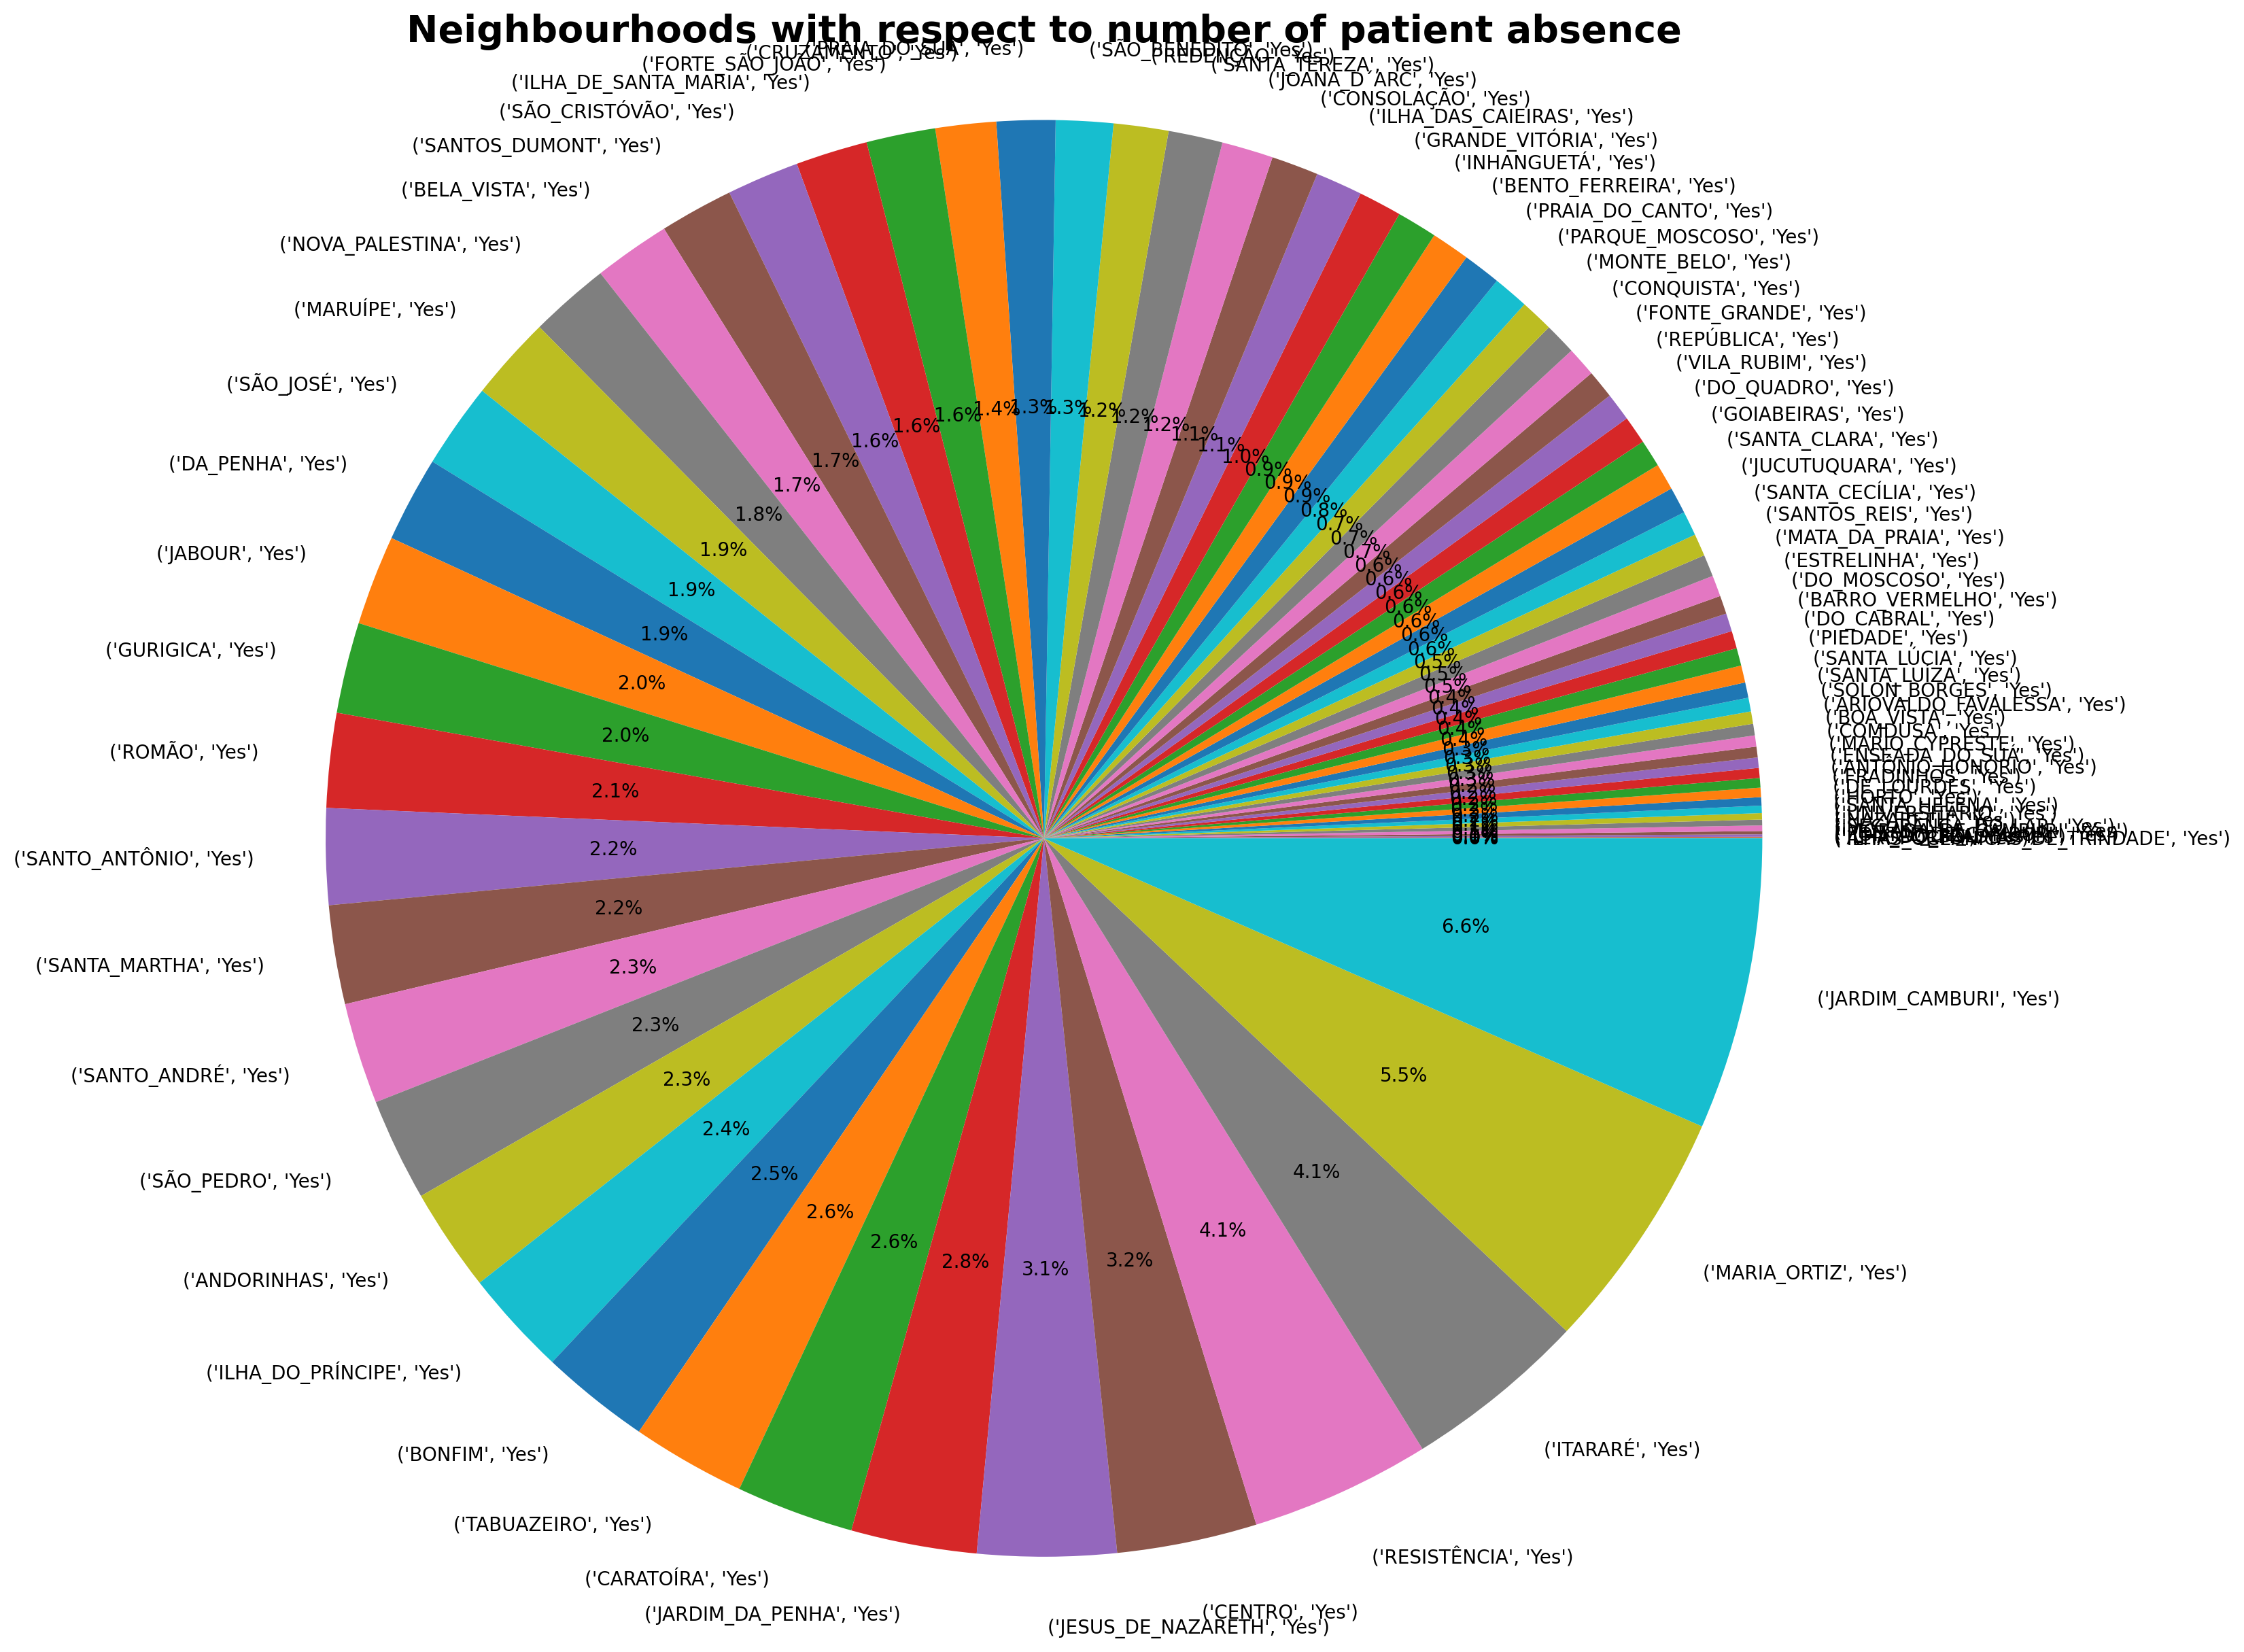

In [58]:
#Creating a DataFrame containing only the patients who didn't show up for their appointment
df_yes= df.query("No_show == 'Yes'")

# Getting counts for Gender and Alcoholism columns
count_yes = df_yes.groupby('Neighbourhood')['No_show'].value_counts().sort_values()

dic_yes = count_yes.to_dict()

labels = list(dic_yes.keys())
value = list(dic_yes.values())  # counts of alcoholism in each gender
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 15), sharey=True)
ax1.pie(value,labels=labels, autopct='%1.1f%%') # autopct for converting counts of alcoholism to precentage per gender
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Neighbourhoods with respect to number of patient absence',fontsize=20, fontweight='bold')
plt.show()


**From the above data:**
>Jardim Camburi got the highest absence **(6.6%)** from the appointments among its concurrents.This could be attributed to the highest reservations counts. Followed by Maria Ortiz **(5.5%)** then ITarae and Resistencia **( 4.1%)**.
    

<a id='conclusions'></a>
## IV.Conclusions

In this analysis, we attempt to explore the medical appointment no-show data to have some insights into the possible reasons for missing the appointment. However, it is worth mentioning that neither the offered data nor the applied statistics can be confirmed accurately the reasons for patients absence. Nevertheless, the insights gained through this analysis can inform and direct further investigations on this topic to examine the causes of appointment missing and find ways to eliminate them.

### IV.I: Analysis related to the no-showing appointments
>In this section, the applied analysis related to no-showing appointments aims to have a glance of factors affecting probability of patient attendace and reasons for missing their appointments.In conclusion, it was found that the patients who received SMS as reminder show-up more with **~ 71 %**.While, patients who didn't receive SMS showed up with **~ 56 %**.Additionally, it is notable that as the duration of waiting for an appointment is prolonged, the probability for showing up decreases.This was displayed when **41.6%** of patients attendance was at the same day of reservation followed by a steep drop in the attendance for the next couple of days.

### IV.II: Analysis related to the patient medical health
>This part of the performed analysis had displayed a statistical comparison between fmales and males with respect to their medical issues including: hypertension, alcoholism and diabetes. Since the majority in the dataset was female patient **(65%)**, females got higher ratio in hypertension and diabetes. Surprisingly, male patients with their minority, had high ratio of *alcoholism* **( >50%)** than the females.May be further investigation should be done for one gender (e.g. female) with respect to their medical issues and their age too.

### IV.III: Analysis related to the health units
> 81 health units were diaplayed in this dataset. **Jardim Camburi** got the highest reservations, followed by Maria Ortiz then Resistenciz.Precentage of attended and absent patients in Jardim Camburi are **81%** and **19%** repectively.
when comparing patient absence ratio in Jardim Camburi with respect to the rest of neighbourhoods, the finding show Jardim Camburi got the first place **(6.6%)**, followed by Maria Ortiz **(5.5%)**. On third place, ITarae and Resistencia **(4.1%)** , menaing that had more attendance than absence.
 
### IV.IV. Analysis limiations 

This section aims to expose some limitations and challenges faced during the data analysis process in order to help improving the data for further analysis:

Further investigation is need related to health units as why Jardim Camburi got the highest count of reservations. Is it related to its exellent medical sevices or just geographically, it close to these patients who booked there. The data required distance required for the patient to reach this heath unit for their his/her appointment. Does long distance influence the rate of absence or not. Another point to be inspect is what are the common characteristics on the top neighbourhoods that got highest reservation in terms of number of doctors, nurses, beds, facilities ..etc.

### IV.V  future investigations
We are aiming to furtherly inspect one type of gender with respect to the health issues. Age will be in categorical scaling range to see which age in each gender has the most combined medical issues.


In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1